In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#===============================================
# Small helper to keep formatting consistent.
#===============================================
hw = {
    "figsize": (9 , 4) ,
    "grid": True ,
    "legend": True ,
}

def finish(ax , title , xlabel = None , ylabel = None):
    ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    plt.tight_layout()
    return ax

In [22]:
#==========
# Setup
#==========
np.random.seed(928)
n = 250

df = pd.DataFrame({
    "region": np.random.choice(["East" , "West" , "Central"] , size = n , p = [0.4 , 0.35 , 0.25]) ,
    "ad_spend": np.random.gamma(shape = 2.5 , scale = 40 , size = n) ,
    "discount": np.random.uniform(0 , 0.25 , size = n) ,
    "orders": np.random.poisson(lam = 18 , size = n).clip(min = 1) ,
})
df["revenue"] = (
        df["ad_spend"] * (2.2 - df["discount"]) + np.random.normal(0 , 40 , size = n)
).clip(lower = 0)
df["returns"] = (
        0.03 * df["orders"] + 8 * df["discount"] + np.random.normal(0 , 0.8 , size = n)
).clip(lower = 0)
df

,region,ad_spend,discount,orders,revenue,returns
0,West,30.367011,0.130370,16,56.568207,2.125141
1,West,71.466326,0.187507,12,115.729984,2.337318
2,East,45.666797,0.193718,26,120.153161,2.145120
3,East,29.024337,0.146308,16,121.149060,1.836712
4,Central,39.825054,0.128046,13,45.907039,2.427639
...,...,...,...,...,...,...
245,Central,69.799151,0.071729,14,138.982125,1.100167
246,Central,74.912444,0.005202,21,53.797925,0.000000
247,West,91.789850,0.220798,14,230.790876,4.287310
248,Central,59.717110,0.215917,17,107.415465,0.724275


<Axes: title={'center': 'Case 1: Revenue vs Ad Spend (scatter)'}, xlabel='Ad spend', ylabel='Revenue'>

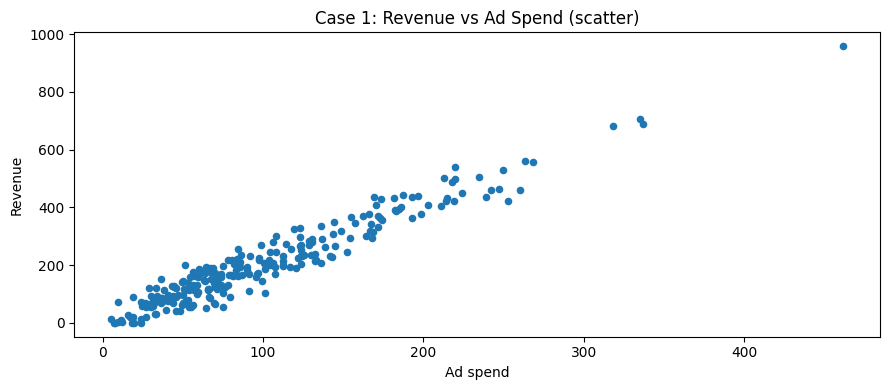

In [23]:
#==========================
# Case 1) Scatter plot
#==========================
ax = df.plot.scatter(x = "ad_spend" , y = "revenue" , figsize = hw["figsize"])
finish(ax , "Case 1: Revenue vs Ad Spend (scatter)" , xlabel = "Ad spend" , ylabel = "Revenue")
plt.show()

<Axes: title={'center': 'Case 2: Bubble scatter (size = orders)'}, xlabel='Ad spend', ylabel='Revenue'>

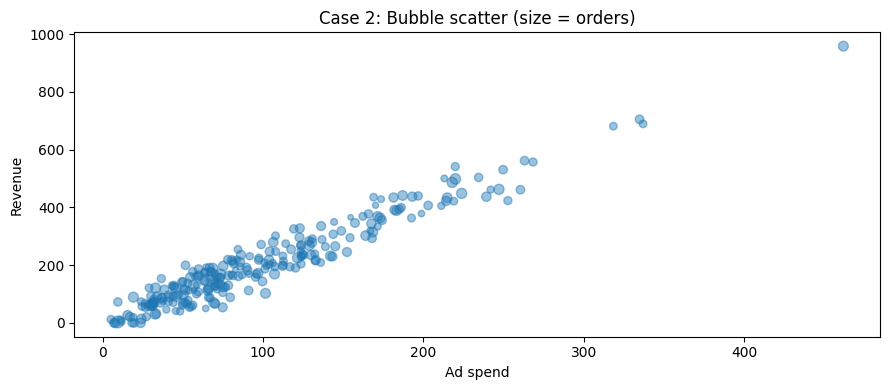

In [24]:
#===================
# Case 2) Scatter
#===================
fig , ax = plt.subplots(figsize = hw["figsize"])
ax.scatter(
    df["ad_spend"] , df["revenue"] , s = (df["orders"] * 2) ,
    alpha = 0.45 , marker = "o"
)
finish(ax , "Case 2: Bubble scatter (size = orders)" , xlabel = "Ad spend" , ylabel = "Revenue")
plt.show()

<Axes: title={'center': 'Case 3: Returns vs Discount by Region'}, xlabel='Discount', ylabel='Returns'>

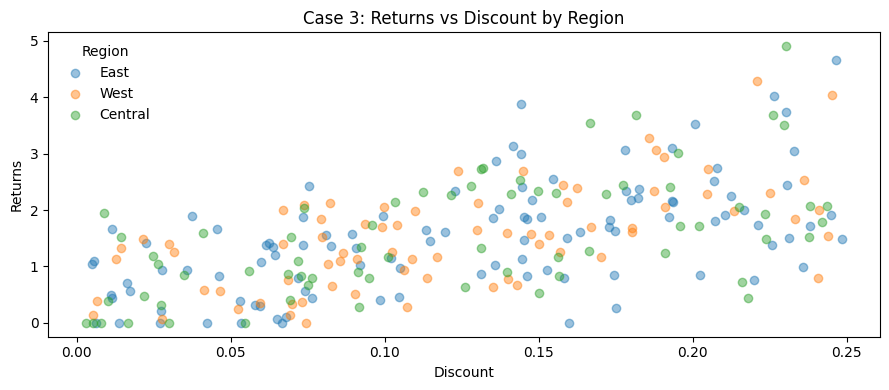

In [25]:
#=============================
# Case 3) Scatter by segment
#=============================
fig , ax = plt.subplots(figsize = hw["figsize"])
for r in ["East" , "West" , "Central"]:
    d = df[df["region"].eq(r)]
    ax.scatter(d["discount"] , d["returns"] , alpha = 0.45 , marker = "o" , label = r)

ax.legend(title = "Region" , frameon = False)
finish(ax , "Case 3: Returns vs Discount by Region" , xlabel = "Discount" , ylabel = "Returns")
plt.show()

<Axes: title={'center': 'Case 4: Hexbin density (Ad spend vs Revenue)'}, xlabel='Ad spend', ylabel='Revenue'>

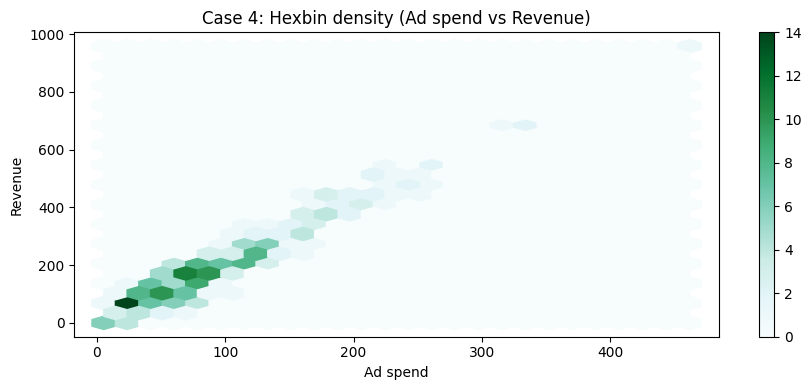

In [26]:
#========================
# Case 4) Hexbin plot
#========================
ax = df.plot.hexbin(
    x = "ad_spend" , y = "revenue" ,
    gridsize = 25 , figsize = hw["figsize"]
)
finish(ax , "Case 4: Hexbin density (Ad spend vs Revenue)" , xlabel = "Ad spend" , ylabel = "Revenue")
plt.show()

<Axes: title={'center': 'Case 5: Hexbin with mean(orders) per bin'}, xlabel='Ad spend', ylabel='Revenue'>

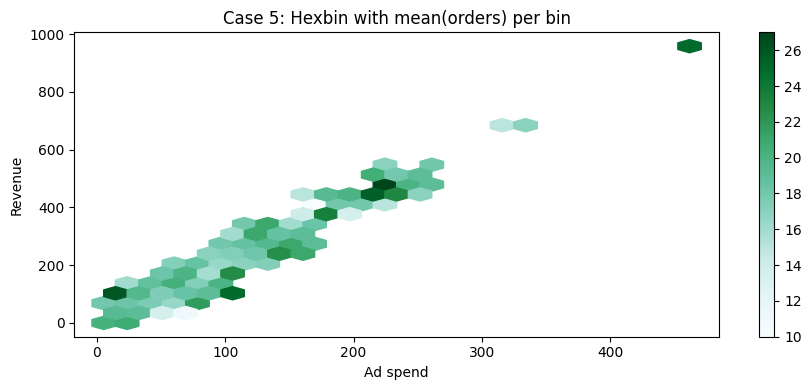

In [27]:
#==================================
# Case 5) Hexbin with aggregation
#==================================
ax = df.plot.hexbin(
    x = "ad_spend" , y = "revenue" , C = "orders" ,
    reduce_C_function = np.mean , gridsize = 25 , figsize = hw["figsize"]
)
finish(ax , "Case 5: Hexbin with mean(orders) per bin" , xlabel = "Ad spend" , ylabel = "Revenue")
plt.show()

<Axes: ylabel='count'>

Text(0, 0.5, '')

Text(0.5, 1.0, 'Case 6: Composition by Region')

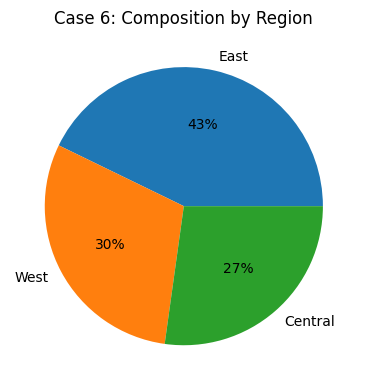

In [28]:
#=====================
# Case 6) Pie plot
#=====================
share = df["region"].value_counts()
share = share.rename_axis("region").reset_index(name = "count")

top = share.head(4).set_index("region")["count"]
other = share["count"].iloc[4:].sum()
if other > 0:
    top.loc["Other"] = other

fig , ax = plt.subplots(figsize = (6 , 4))
top.plot(kind = "pie" , autopct = "%.0f%%" , ax = ax)
ax.set_ylabel("")
ax.set_title("Case 6: Composition by Region")
plt.tight_layout()
plt.show()